In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
if 'Cabin' in df.columns:
    df['Cabin'] = df['Cabin'].fillna('Unknown')

if 'Survived' in df.columns:
    df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce').fillna(0).astype(int)

df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [21]:
if set(['SibSp','Parch']).issubset(df.columns):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
else:
    df['FamilySize'] = np.nan

if 'Age' in df.columns:
    df['AgeGroup'] = pd.cut(
        df['Age'],
        bins=[0,12,18,40,60,120],
        labels=['Child','Teen','Adult','MidAge','Senior'],
        include_lowest=True
    )
else:
    df['AgeGroup'] = np.nan

df[['Age','FamilySize','AgeGroup']].head()

,Age,FamilySize,AgeGroup
0,22.0,2,Adult
1,38.0,2,Adult
2,26.0,1,Adult
3,35.0,2,Adult
4,35.0,1,Adult


In [22]:
print('=== Numeric Summary (Age, Fare) ===')
numeric_cols = [c for c in ['Age','Fare'] if c in df.columns]
if numeric_cols:
    display(df[numeric_cols].describe().round(2))
else:
    print('Age/Fare not found.')

def survival_rate_by(cols):
    cols = [c for c in cols if c in df.columns]
    if 'Survived' in df.columns and cols:
        out = (df.groupby(cols)['Survived']
                 .mean()
                 .reset_index()
                 .rename(columns={'Survived':'Survival_Rate'}))
        return out
    return None

sr_sex = survival_rate_by(['Sex'])
sr_pclass = survival_rate_by(['Pclass'])
sr_agegrp = survival_rate_by(['AgeGroup'])

sr_sex, sr_pclass, sr_agegrp

=== Numeric Summary (Age, Fare) ===


,Age,Fare
count,891.00,891.00
mean,29.36,32.20
std,13.02,49.69
min,0.42,0.00
25%,22.00,7.91
50%,28.00,14.45
75%,35.00,31.00
max,80.00,512.33


C:\Users\Ravali Pavan\AppData\Local\Temp\ipykernel_26872\332315715.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out = (df.groupby(cols)['Survived']


(      Sex  Survival_Rate
 0  female       0.742038
 1    male       0.188908,
    Pclass  Survival_Rate
 0       1       0.629630
 1       2       0.472826
 2       3       0.242363,
   AgeGroup  Survival_Rate
 0    Child       0.579710
 1     Teen       0.428571
 2    Adult       0.360465
 3   MidAge       0.390625
 4   Senior       0.227273)

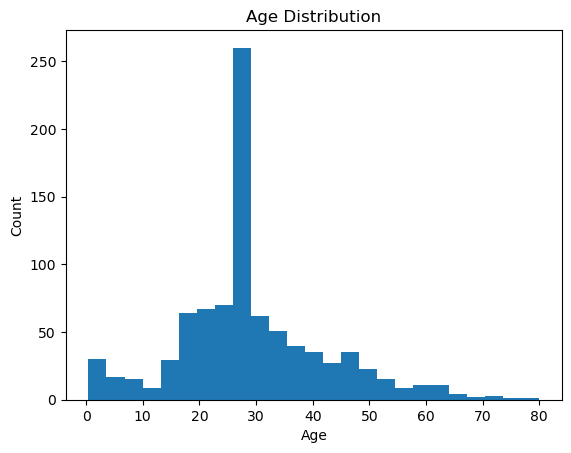

In [23]:
if 'Age' in df.columns:
    plt.figure()
    df['Age'].plot(kind='hist', bins=25)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

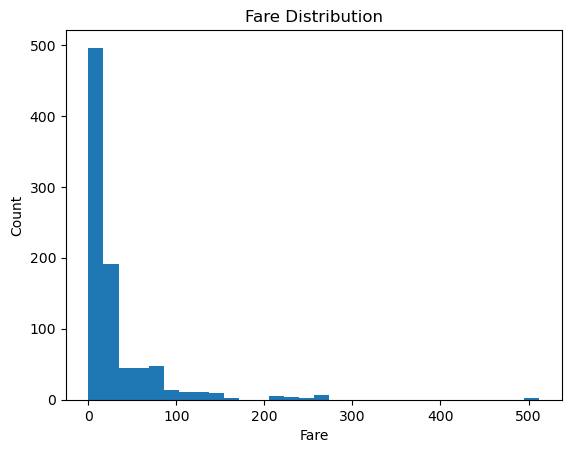

In [24]:
if 'Fare' in df.columns:
    plt.figure()
    df['Fare'].plot(kind='hist', bins=30)
    plt.title('Fare Distribution')
    plt.xlabel('Fare')
    plt.ylabel('Count')
    plt.show()

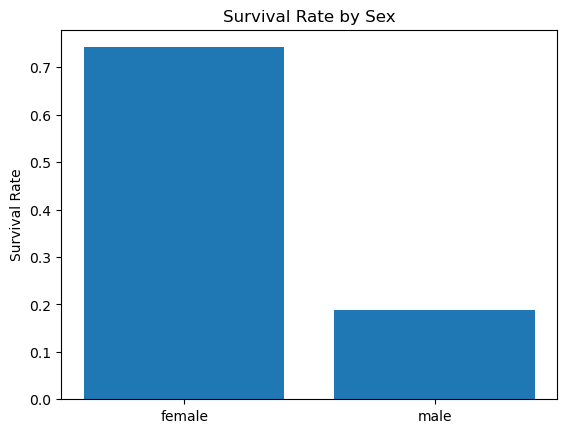

In [25]:
if sr_sex is not None:
    plt.figure()
    plt.bar(sr_sex['Sex'].astype(str), sr_sex['Survival_Rate'])
    plt.title('Survival Rate by Sex')
    plt.ylabel('Survival Rate')
    plt.show()

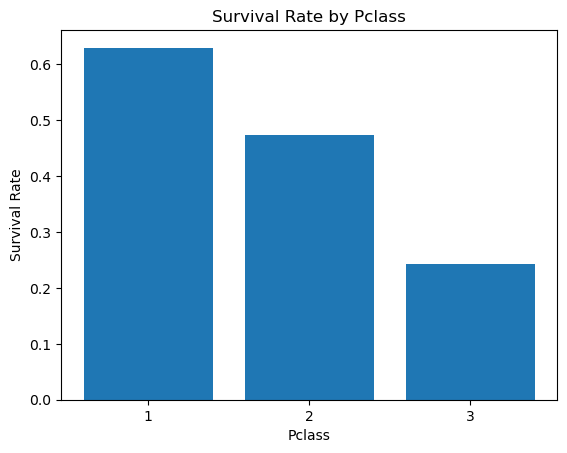

In [26]:
if sr_pclass is not None:
    plt.figure()
    plt.bar(sr_pclass['Pclass'].astype(str), sr_pclass['Survival_Rate'])
    plt.title('Survival Rate by Pclass')
    plt.xlabel('Pclass')
    plt.ylabel('Survival Rate')
    plt.show()

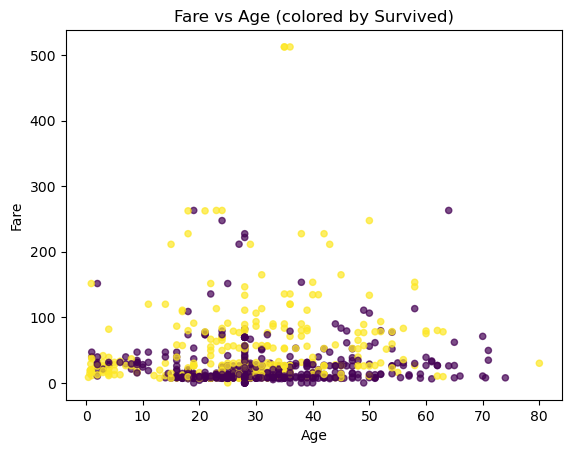

In [27]:
if set(['Age','Fare','Survived']).issubset(df.columns):
    plt.figure()
    plt.scatter(df['Age'], df['Fare'], c=df['Survived'], s=20, alpha=0.7)
    plt.title('Fare vs Age (colored by Survived)')
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.show()

In [28]:
summary = (df.groupby(["Sex","Pclass","AgeGroup"])
             .agg(
                 Avg_Age=("Age","mean"),
                 Avg_Fare=("Fare","mean"),
                 Survival_Rate=("Survived","mean")
             )
             .reset_index())

summary = summary.round({"Avg_Age":1,"Avg_Fare":1,"Survival_Rate":2})

import tabulate
print(tabulate.tabulate(summary, headers="keys", tablefmt="pipe", showindex=False))


| Sex    |   Pclass | AgeGroup   |   Avg_Age |   Avg_Fare |   Survival_Rate |
|:-------|---------:|:-----------|----------:|-----------:|----------------:|
| female |        1 | Child      |       2   |      151.6 |            0    |
| female |        1 | Teen       |      16.5 |      125.1 |            1    |
| female |        1 | Adult      |      29.8 |      108.3 |            0.98 |
| female |        1 | MidAge     |      50.2 |       93.5 |            0.96 |
| female |        1 | Senior     |      62.5 |       79   |            1    |
| female |        2 | Child      |       4.9 |       30.4 |            1    |
| female |        2 | Teen       |      16.2 |       18   |            1    |
| female |        2 | Adult      |      29   |       21.1 |            0.92 |
| female |        2 | MidAge     |      47.9 |       22   |            0.85 |
| female |        2 | Senior     |     nan   |      nan   |          nan    |
| female |        3 | Child      |       4.9 |       21.7 |     

C:\Users\Ravali Pavan\AppData\Local\Temp\ipykernel_26872\630661324.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = (df.groupby(["Sex","Pclass","AgeGroup"])


In [29]:
pip install groq

In [32]:
import os
import pandas as pd
from groq import Groq

# Ensure summary exists
if 'summary' not in globals():
    summary = (df.groupby(["Sex","Pclass","AgeGroup"])
                 .agg(Avg_Age=("Age","mean"),
                      Avg_Fare=("Fare","mean"),
                      Survival_Rate=("Survived","mean"))
                 .reset_index()
                 .round({"Avg_Age":1,"Avg_Fare":1,"Survival_Rate":2}))

def df_to_markdown(df: pd.DataFrame) -> str:
    headers = list(df.columns)
    lines = []
    lines.append("| " + " | ".join(map(str, headers)) + " |")
    lines.append("|" + "|".join(["---"]*len(headers)) + "|")
    for _, row in df.iterrows():
        lines.append("| " + " | ".join(map(lambda x: str(x), row.values)) + " |")
    return "\n".join(lines)

table_md = df_to_markdown(summary)

prompt = f"""

Table:
{table_md}

Questions:
1) Which passenger group has the highest survival rate?
2) Are there unusual patterns in fare vs age?
3) Suggest one feature or visualization to better explore survival trends.
4) Summarize the 3–5 factors that most influenced survival.

Constraints:
- Be concise (<= 10 bullet points total).
- Reference values from the table when helpful.
"""

api_key = os.getenv("GROQ_API_KEY")
if not api_key:
    raise RuntimeError("GROQ_API_KEY not set. Please set it in your environment and re-run.")

client = Groq(api_key=api_key)

resp = client.chat.completions.create(
    model="llama-3.1-8b-instant",
    messages=[{"role":"user","content":prompt}]
)
print(resp.choices[0].message.content)

**Answers based on the provided table:**

1. **Highest Survival Rate:** The Senior female passengers from classes 1 and 3 have a 100% and 100% survival rate, respectively. However, considering the most age-balanced and fare-varied category (MidAge in class 1 females), we see that female MidAge passengers in class 1 have a survival rate of 0.96, indicating that the Senior female group has a remarkably high survival rate.
   
2. **Unusual Patterns in Fare vs Age:** Upon examining the data, there doesn't seem to be any unusual patterns in fare vs age in general. However, for each class and sex, we can observe a general trend that fares decrease with age.

3. **Feature/Visualization:**

- To further explore survival trends, consider creating a **scatter plot with survival rates vs age**. This will help visualize the interaction between survival probability and age and provide a clear picture of how age affects survival for different passenger groups.

4. **Top Factors Influencing Survival: